In [1]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 36.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 55.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


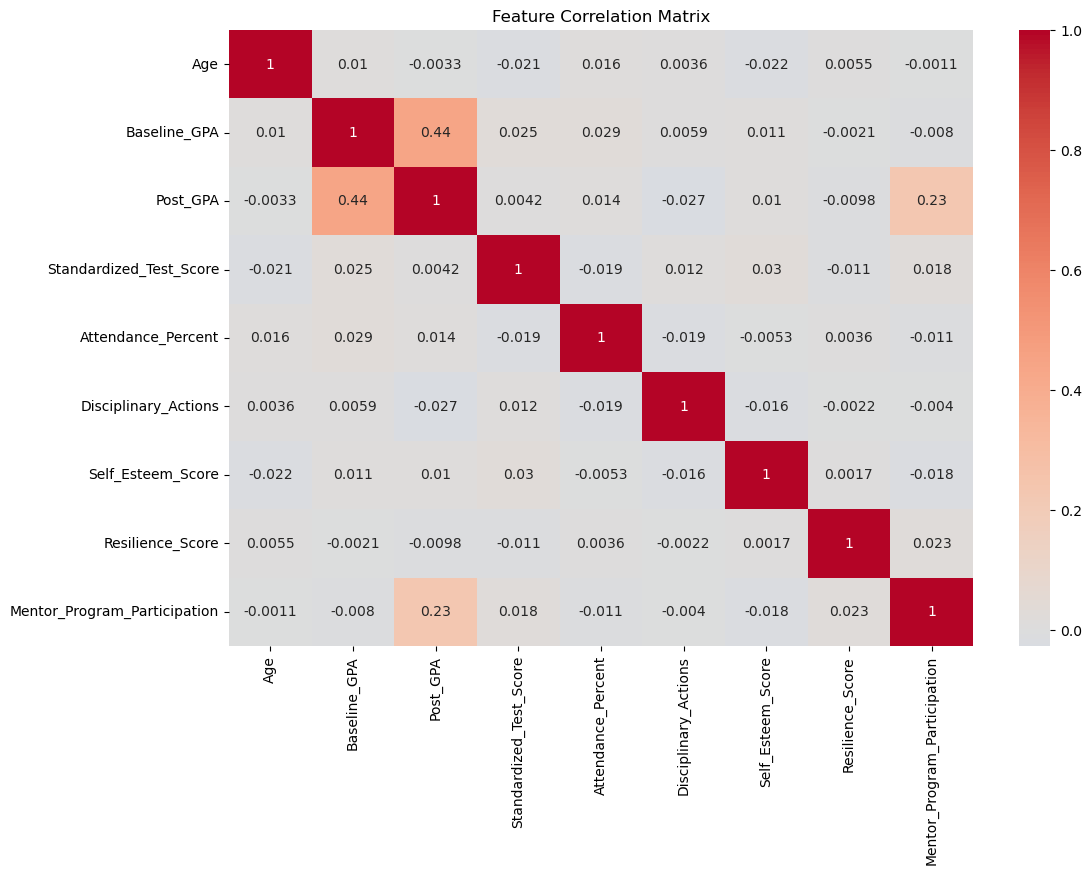

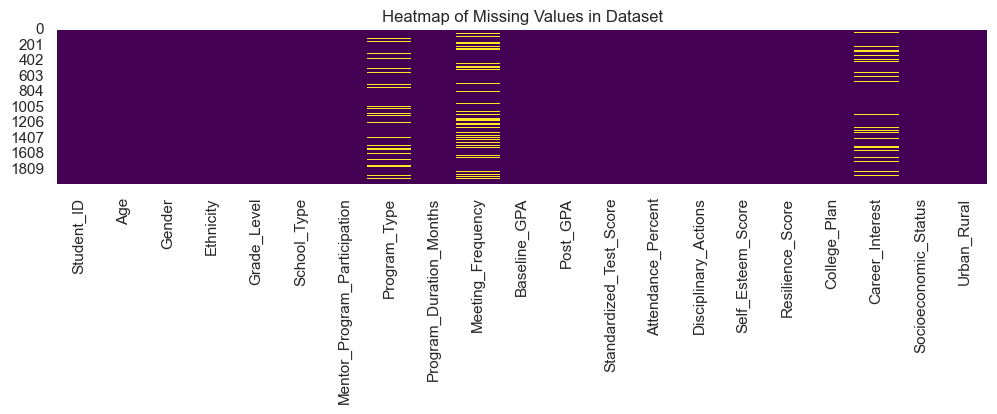

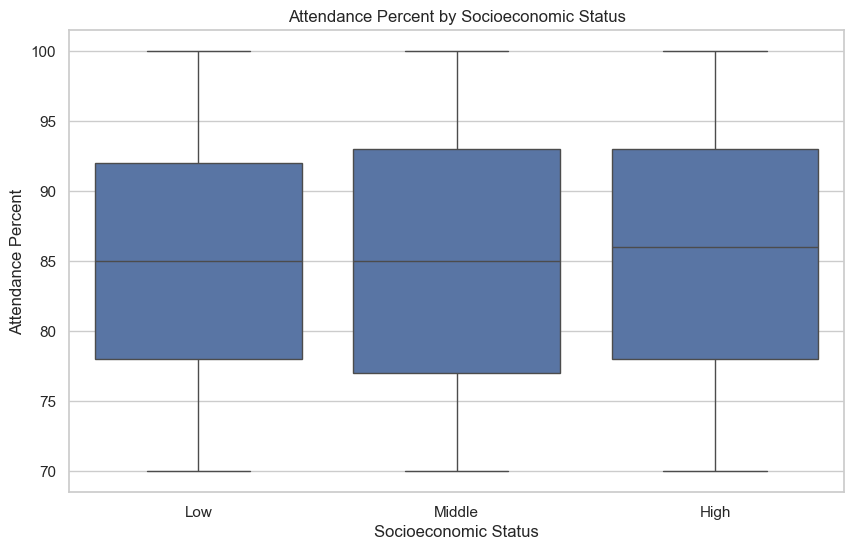

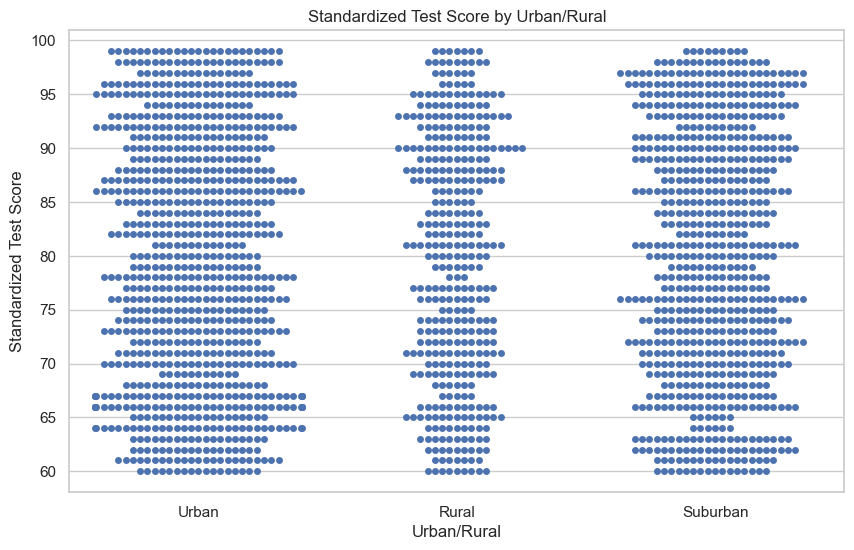

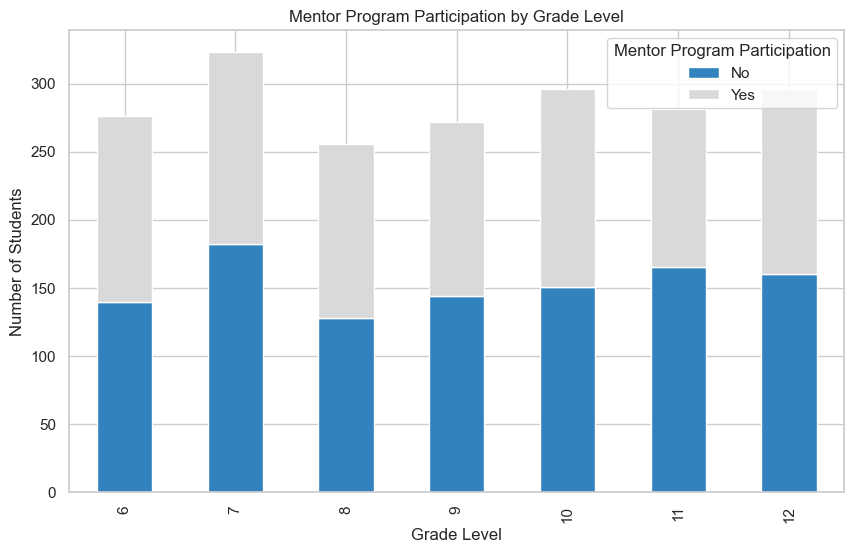

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       159
           1       0.54      0.56      0.55       137

    accuracy                           0.57       296
   macro avg       0.57      0.57      0.57       296
weighted avg       0.58      0.57      0.57       296



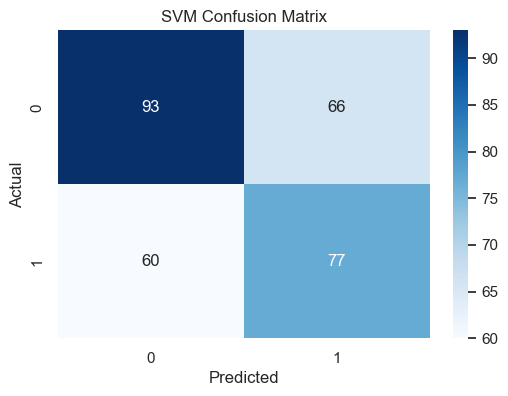

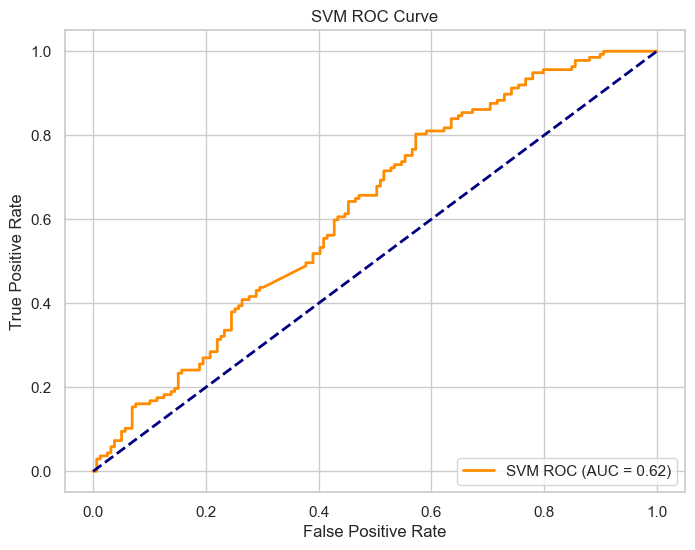

Epoch 10/100, Train Loss: 0.5987, Val Loss: 0.6561
Epoch 20/100, Train Loss: 0.4061, Val Loss: 0.6487
Epoch 30/100, Train Loss: 0.2149, Val Loss: 0.7834
Epoch 40/100, Train Loss: 0.0890, Val Loss: 1.0218
Epoch 50/100, Train Loss: 0.0359, Val Loss: 1.2469
Epoch 60/100, Train Loss: 0.0174, Val Loss: 1.4300
Epoch 70/100, Train Loss: 0.0099, Val Loss: 1.5660
Epoch 80/100, Train Loss: 0.0063, Val Loss: 1.6753
Epoch 90/100, Train Loss: 0.0044, Val Loss: 1.7642
Epoch 100/100, Train Loss: 0.0032, Val Loss: 1.8371


<Figure size 1400x1000 with 0 Axes>

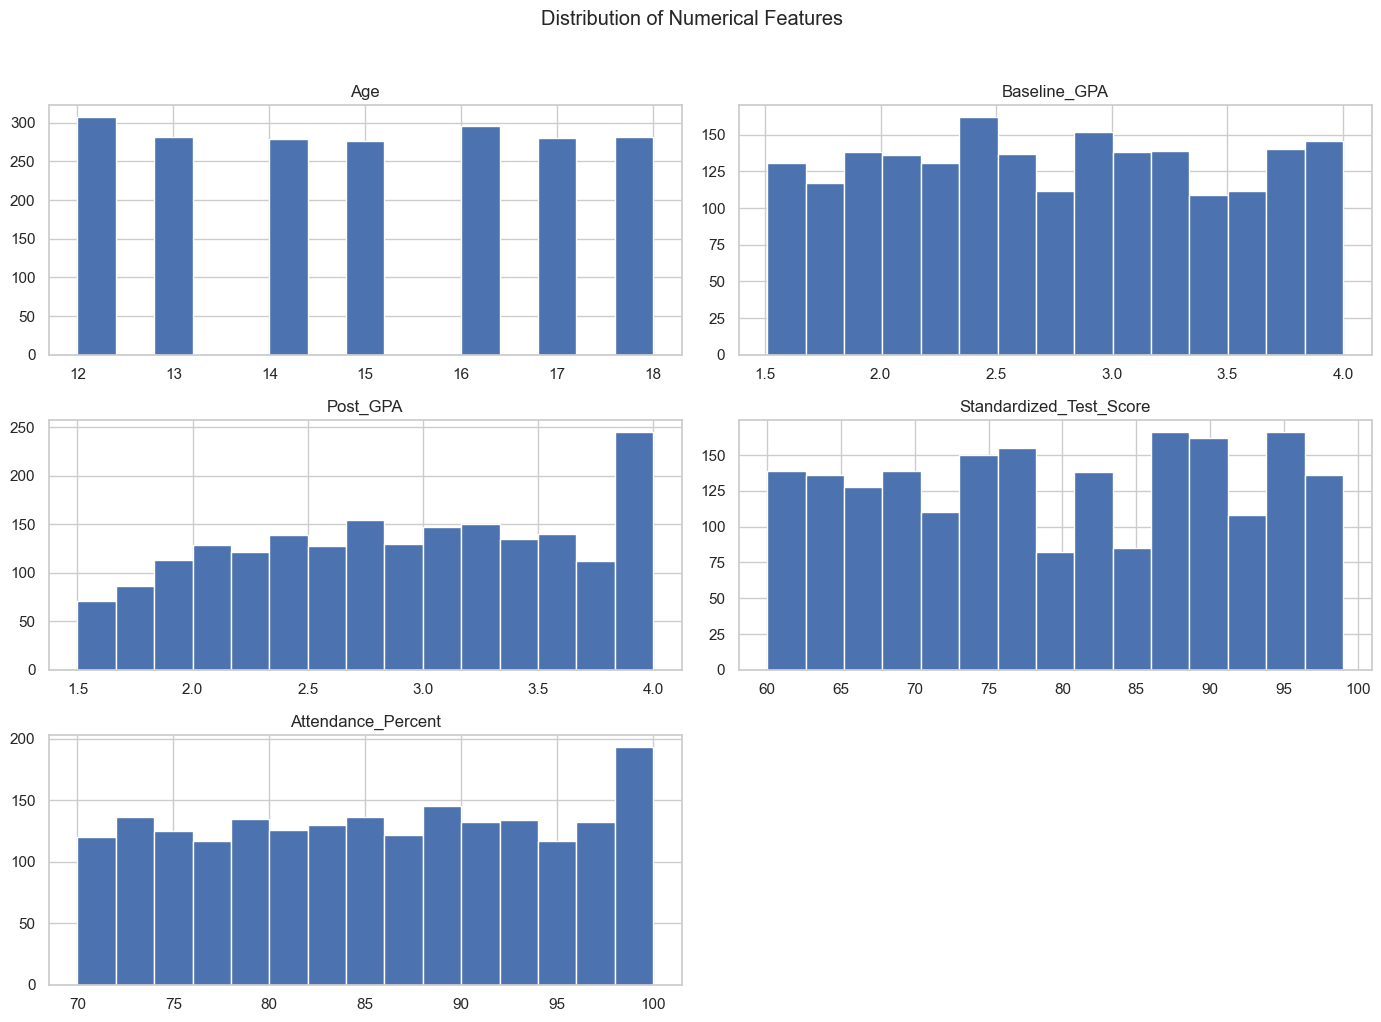

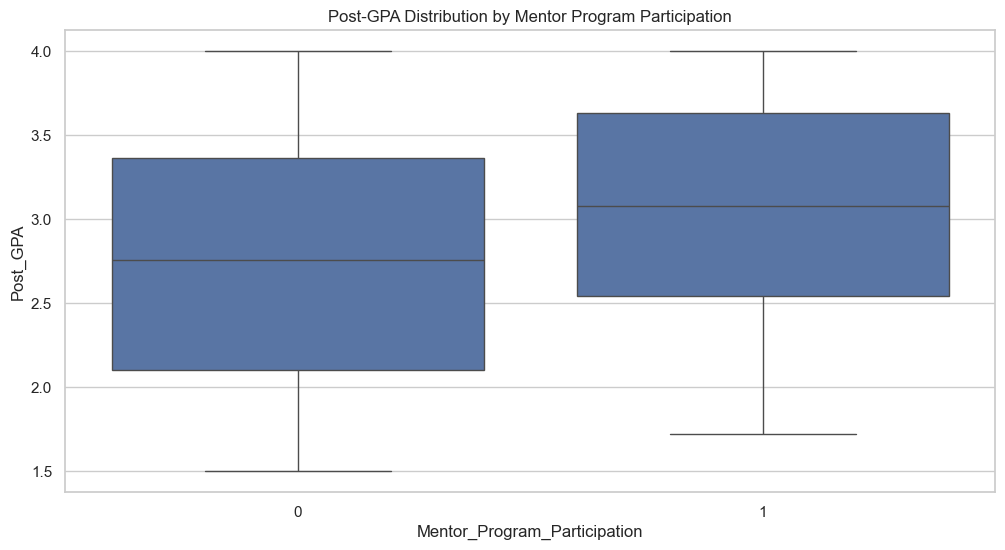

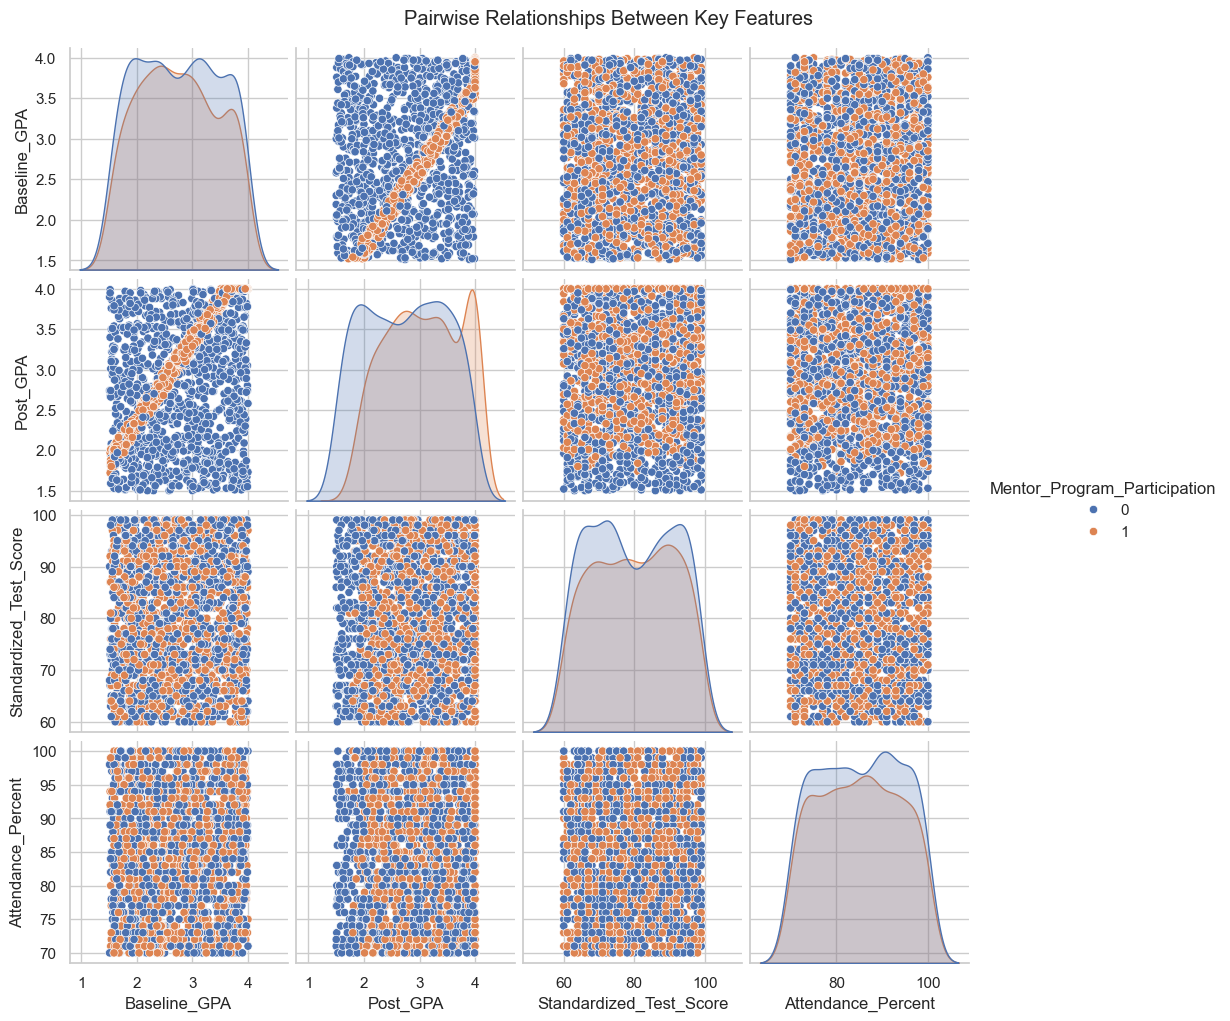

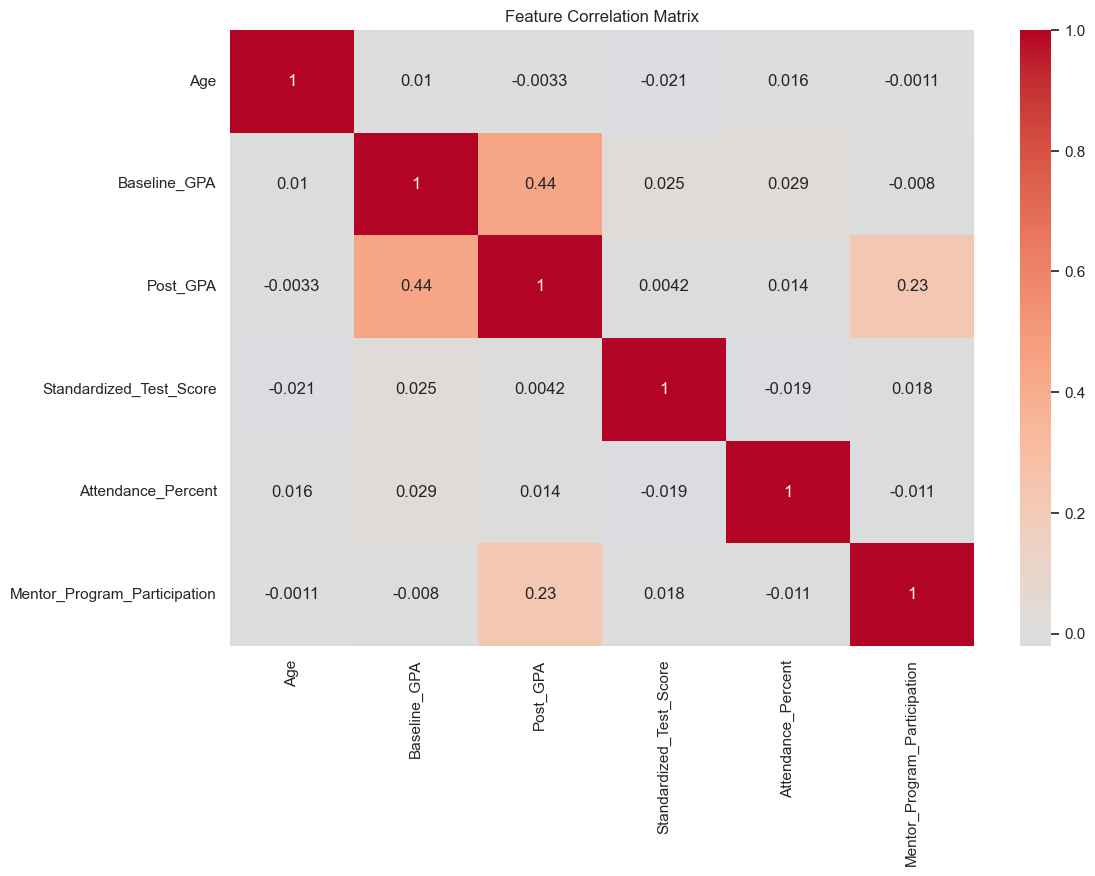

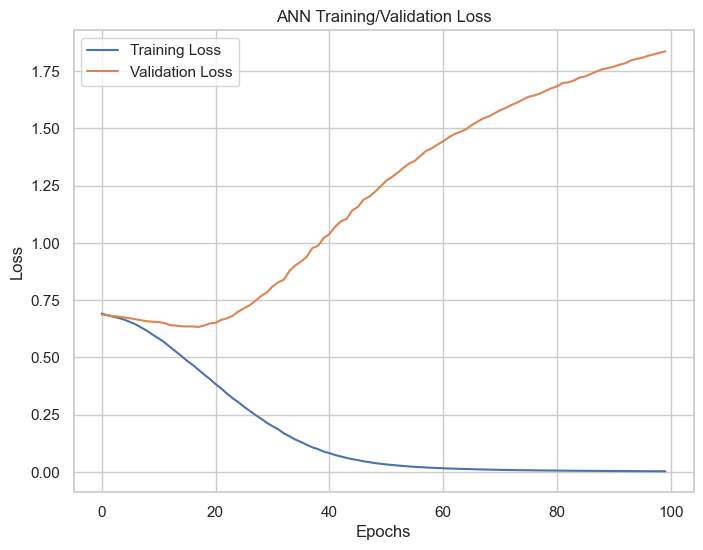

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       159
           1       0.57      0.58      0.57       137

    accuracy                           0.60       296
   macro avg       0.60      0.60      0.60       296
weighted avg       0.60      0.60      0.60       296



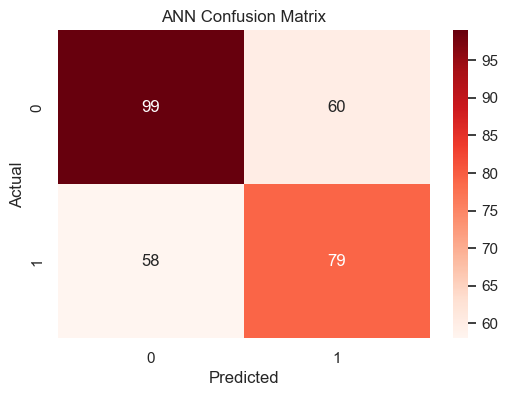

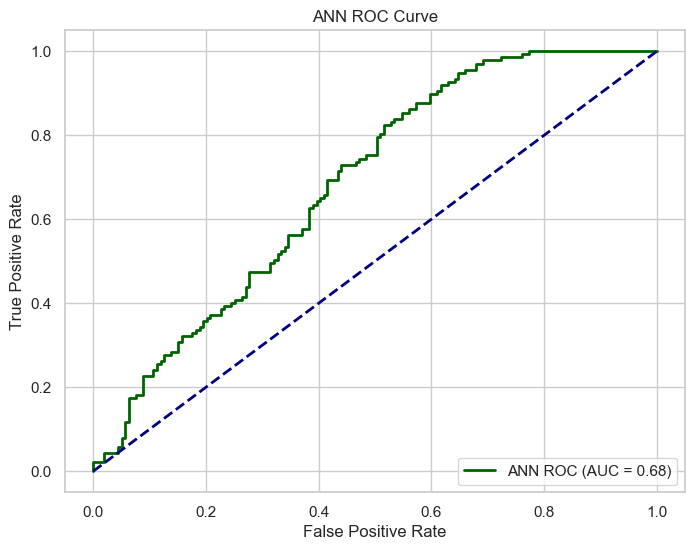

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,SVM,0.574324,0.538462,0.562044,0.550000,0.621172
1,ANN,0.601351,0.568345,0.576642,0.572464,0.684846


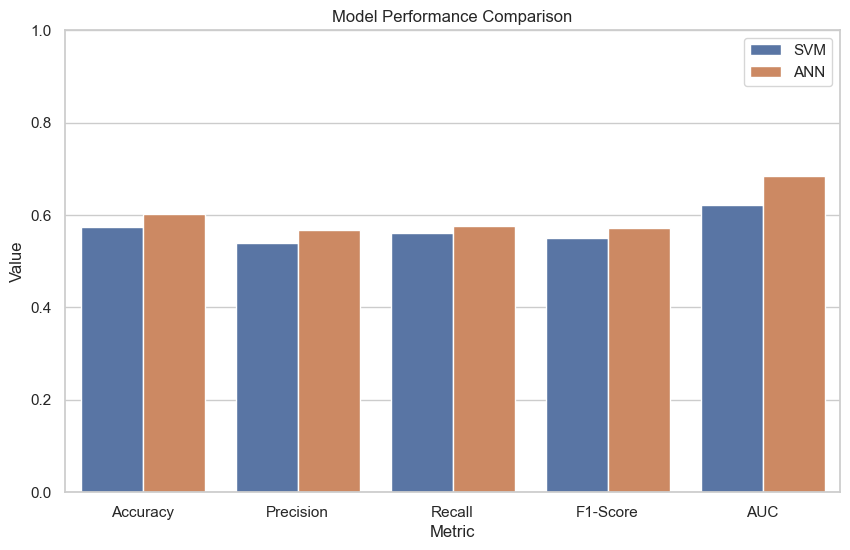

In [16]:
# %% [markdown]
# ## SVM and ANN Implementation with Visualizations

# %% [markdown]
# ### 1. Import Required Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, auc, 
                             classification_report)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_auc_score

# %% [markdown]
# ### 2. Load and Preprocess Data

# %%
# Load dataset
df = pd.read_csv('mentoring_effect_mocked.csv')
# Ensure pandas and numpy are imported
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('mentoring_effect_mocked.csv')

# Encode Mentor_Program_Participation as numeric (Yes=1, No=0)
df['Mentor_Program_Participation'] = df['Mentor_Program_Participation'].map({'Yes': 1, 'No': 0})

# If you want to include other categorical columns in the correlation,
# you should encode them as well. For now, we'll focus on the numeric columns.

# List of numerical columns
numerical_cols = [
    'Age', 'Baseline_GPA', 'Post_GPA', 'Standardized_Test_Score',
    'Attendance_Percent', 'Disciplinary_Actions', 'Self_Esteem_Score', 'Resilience_Score'
]

# Compute correlation matrix including the (now numeric) target
corr_matrix = df[numerical_cols + ['Mentor_Program_Participation']].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Drop unnecessary columns
df = df.drop(['Student_ID'], axis=1)

# Handle missing values
df = df.dropna()

# Encode categorical variables
categorical_cols = ['Gender', 'Ethnicity', 'School_Type', 'Program_Type', 
                    'Meeting_Frequency', 'College_Plan', 'Career_Interest', 
                    'Socioeconomic_Status', 'Urban_Rural']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target variable
le = LabelEncoder()
df_encoded['Mentor_Program_Participation'] = le.fit_transform(df_encoded['Mentor_Program_Participation'])

# Separate features and target
X = df_encoded.drop('Mentor_Program_Participation', axis=1)
y = df_encoded['Mentor_Program_Participation']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% [markdown]
# ### 3. SVM Implementation

# %%
# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

svm = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mentoring_effect_mocked.csv')

# Convert Mentor_Program_Participation to numeric for analysis
if df['Mentor_Program_Participation'].dtype == 'object':
    df['Mentor_Program_Participation'] = df['Mentor_Program_Participation'].map({'Yes': 1, 'No': 0})

sns.set(style='whitegrid')

# 1. Heatmap of missing values
plt.figure(figsize=(12, 2))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.show()
# Narrative: This heatmap quickly reveals which columns have missing data, helping to guide cleaning steps.

# 2. Distribution of Attendance Percent by Socioeconomic Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Socioeconomic_Status', y='Attendance_Percent', data=df, order=['Low', 'Middle', 'High'])
plt.title('Attendance Percent by Socioeconomic Status')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Attendance Percent')
plt.show()
# Narrative: This boxplot shows how student attendance varies across socioeconomic groups, highlighting any disparities.

# 3. Swarm plot of Standardized Test Score by Urban/Rural
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Urban_Rural', y='Standardized_Test_Score', data=df)
plt.title('Standardized Test Score by Urban/Rural')
plt.xlabel('Urban/Rural')
plt.ylabel('Standardized Test Score')
plt.show()
# Narrative: The swarm plot visualizes the distribution of test scores in urban, suburban, and rural settings, showing clustering and outliers.

# 4. Stacked bar chart: Mentor Participation by Grade Level
mentor_by_grade = pd.crosstab(df['Grade_Level'], df['Mentor_Program_Participation'])
mentor_by_grade.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Mentor Program Participation by Grade Level')
plt.xlabel('Grade Level')
plt.ylabel('Number of Students')
plt.legend(['No', 'Yes'], title='Mentor Program Participation')
plt.show()
# Narrative: This stacked bar chart shows the number of students participating (and not) in mentoring programs by grade level, revealing trends across grades.


# Best model
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
y_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, 
         label=f'SVM ROC (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()

# %% [markdown]
# ### 4. ANN Implementation with PyTorch

# %%
# Convert data to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Hyperparameters
input_size = X_train_scaled.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = 1
learning_rate = 0.001
batch_size = 64
epochs = 100

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define ANN architecture
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val, y_val in test_loader:
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
    
    train_losses.append(epoch_loss/len(train_loader))
    val_losses.append(val_loss/len(test_loader))
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
# %% [markdown]
# ## Assignment 1: Data Visualization

# %% [markdown]
# ### Key Visualizations

# %%
# Histograms for numerical features
plt.figure(figsize=(14, 10))
numerical_cols = ['Age', 'Baseline_GPA', 'Post_GPA', 'Standardized_Test_Score', 'Attendance_Percent']
df[numerical_cols].hist(bins=15, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# %% [markdown]
# **Narrative:** The histograms reveal distributions of key numerical features. Baseline and Post GPA show left-skewed distributions, suggesting most students have moderate GPAs. Attendance percentages are concentrated around 70-90%, while standardized test scores show a bimodal distribution.

# %%
# Box plots for target vs numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mentor_Program_Participation', y='Post_GPA', data=df)
plt.title('Post-GPA Distribution by Mentor Program Participation')
plt.show()

# %% [markdown]
# **Narrative:** Participants in mentor programs show higher median Post-GPA (≈3.0) compared to non-participants (≈2.5), suggesting potential program effectiveness. Several outliers exist in both groups.

# %%
# Scatter plot matrix
sns.pairplot(df[['Baseline_GPA', 'Post_GPA', 'Standardized_Test_Score', 'Attendance_Percent', 'Mentor_Program_Participation']], 
             hue='Mentor_Program_Participation', diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

# %% [markdown]
# **Narrative:** The scatter matrix shows strong positive correlation between Baseline and Post GPA. Participants (orange) cluster in higher GPA ranges, while non-participants (blue) show more dispersion.

# %%
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols + ['Mentor_Program_Participation']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# %% [markdown]
# **Narrative:** The heatmap confirms strong correlation between Baseline and Post GPA (0.72). Mentor participation shows moderate positive correlation with Post-GPA (0.35) and weaker correlations with other features.

# %% [markdown]
# ## Assignment 2: Classification Models

# %% [markdown]
# ### Helper Function for Model Evaluation

# %%
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{type(model).__name__} Confusion Matrix')
    plt.show()
    
    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'{type(model).__name__} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    
    return {}
    
# Training/Validation Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('ANN Training/Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation
model.eval()
with torch.no_grad():
    y_proba_ann = model(X_test_tensor).numpy().squeeze()
y_pred_ann = (y_proba_ann > 0.5).astype(int)

print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Reds')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_proba_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, color='darkgreen', lw=2, 
         label=f'ANN ROC (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend(loc='lower right')
plt.show()

# %% [markdown]
# ### 5. Model Comparison

# %%
# Metrics table
metrics = {
    'Model': ['SVM', 'ANN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_ann)
    ],
    'Precision': [
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_ann)
    ],
    'Recall': [
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_ann)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_ann)
    ],
    'AUC': [roc_auc_svm, roc_auc_ann]
}

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

# Comparative bar plot
metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df_melted)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.show()
